In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from math import log

## Gaussian Distribution 
\begin{align}
\ Gaussian = \frac{1}{\sigma \sqrt 2\pi } e^{-\frac{(x-\mu)^2}{2 \sigma^2}}  \\
\end{align}

In [2]:
# Returns y given x, mu, sigma
def gaussian(x, mu=1, sigma=0.3):
    return np.exp(-((x - mu) ** 2)/(2*sigma**2)) / (sigma * np.sqrt(2*np.pi))

### The Box-Muller Transform is an algorithm to generate points around (0,0) that will be distributed normally on the x, and y axis.


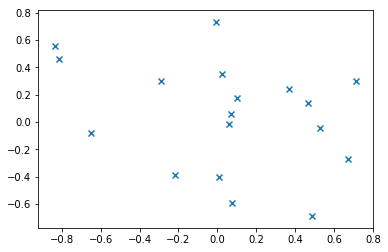

In [3]:
def gen_box_muller(x, y, num_points, max_dist):    
    U1 = np.random.uniform(0, 1, num_points)
    U2 = np.random.uniform(0, 1, num_points)

    z0 = np.sqrt(-2 * np.log(U1)) * np.cos(2 * np.pi * U2).astype(float) + x
    z1 = np.sqrt(-2 * np.log(U1)) * np.sin(2 * np.pi * U2).astype(float) + y
    points = np.stack((z0, z1), axis = 1)
    
    points_filtered = points[np.where(np.sqrt((x-z0)**2 + (y-z1)**2) <= max_dist)]
    
    return points_filtered

points = gen_box_muller(0,0, 50, 1)

z0 = points[:,0]
z1 = points[:,1]

plt.scatter(z0, z1, marker = 'x')

plt.show()

In [4]:
def gen(file, num_clusters, points_min=25, points_max=50, x_min=0, x_max=20, y_min=0, y_max=20, max_dist=1.5):    
    for i in range(num_clusters):
        centre_x = np.random.randint(x_min, x_max, size=1)
        centre_y = np.random.randint(y_min, y_max, size=1)
        num_points = np.random.randint(points_min, points_max, size=1)
        
        points = gen_box_muller(centre_x, centre_y, num_points, max_dist)
#         file.write(f"{z0} {z1}")
        np.savetxt(file, points)
    
        z0 = points[:,0]
        z1 = points[:,1]
        plt.scatter(z0, z1, marker = 'x')
    plt.show()

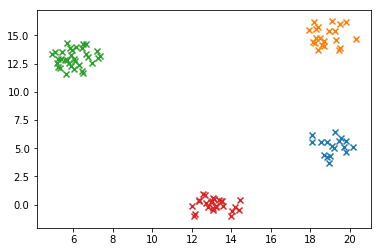

In [5]:
with open('gen_cluster.txt', 'a+') as out_file:
    gen(out_file, num_clusters=4)